In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nishadchaoji","key":"822bfa9b84c61ddf1d4929ddd5479460"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud


 59% 39.0M/66.0M [00:00<00:00, 215MB/s] 
100% 66.0M/66.0M [00:00<00:00, 228MB/s]


In [ ]:
!unzip creditcardfraud.zip


Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
import pandas as pd 
DF = pd.read_csv("creditcard.csv")


In [ ]:
# Splitting the dataframe into X and Y
X = DF.iloc[:, DF.columns != 'Class']
y = DF.iloc[:, DF.columns == 'Class']


In [ ]:
# Working with imbalanced data
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import StandardScaler as ss
from sklearn.model_selection import train_test_split
# Scale all numerical features in X  using sklearn's StandardScaler class
scale = ss()
X_trans = scale.fit_transform(X)
X_trans.shape
#Balancing the Data using ADASYN 
ad = ADASYN()
X_res1, y_res1 = ad.fit_resample(X_trans, y)

type(X_res1)


numpy.ndarray

In [ ]:
import numpy as np

Y_res =  pd.DataFrame(y_res1, columns =["Class"])


In [ ]:
X_res = pd.DataFrame(X_res1, columns = ["Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount"])

In [ ]:
DF_resampled =  pd.concat([X_res, Y_res], axis=1, join='inner')
DF_resampled = DF_resampled.sample(frac=1, random_state=42).reset_index(drop=True)
DF_resampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.257301,0.676441,-0.273303,0.129576,0.038776,-0.241281,0.510155,-0.533438,0.181576,0.976032,...,-0.093065,0.171946,-0.374034,-1.059516,0.919309,2.062081,-0.058156,-0.023091,-0.218679,1
1,-0.480742,-0.165206,0.594692,0.227489,0.492080,0.603002,-0.145318,0.393467,0.113131,-0.556860,...,-0.031828,-0.062900,-0.149918,-0.270163,0.030513,-0.187722,-0.067660,0.031977,-0.345537,1
2,-1.906729,-0.434981,0.566553,1.443122,0.500956,0.129636,-0.262210,0.693247,-0.348517,0.970641,...,-0.559578,-0.557753,-0.155163,0.667842,0.723969,0.713717,-0.000771,-0.378966,-0.231168,0
3,0.554818,0.733838,0.541549,-0.234126,2.535192,0.585639,-0.024091,0.341123,-0.133999,-0.212908,...,-0.108302,-0.002286,0.261168,-0.013825,-0.642257,-0.320431,-0.005387,-0.005716,-0.350578,1
4,1.552941,1.081754,0.005931,-0.894562,0.161399,0.229605,-0.569941,0.191868,-0.289374,0.396517,...,-0.446029,-1.035644,0.377979,-1.134939,-0.311292,0.496107,-0.160148,-0.198675,-0.351830,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

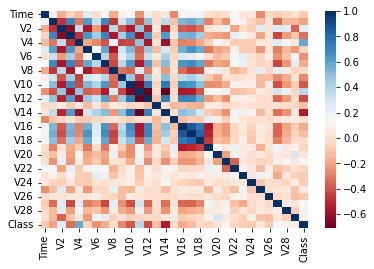

In [ ]:
corr = DF_resampled.corr()
sns.heatmap(corr,cmap='RdBu')

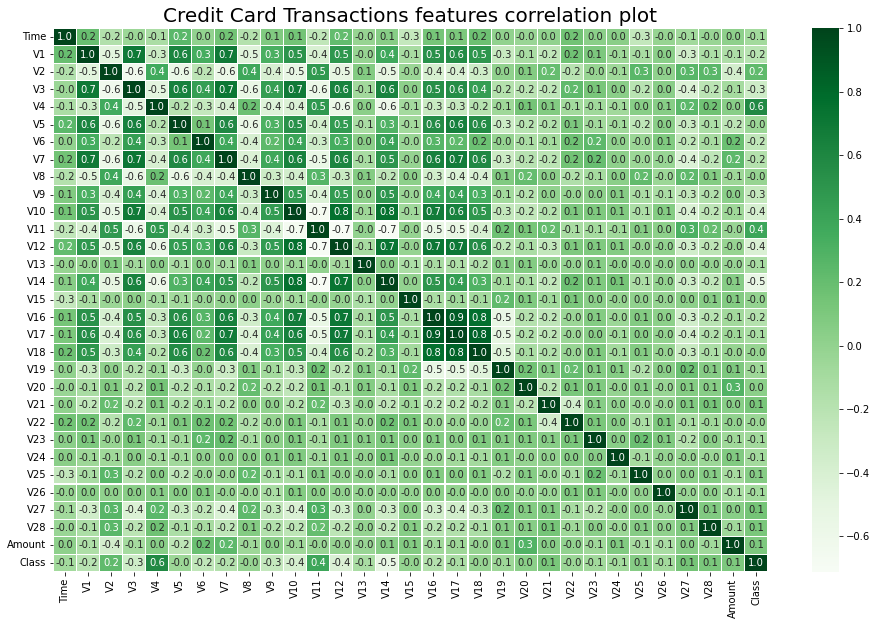

In [ ]:
plt.figure(figsize = (16,10))
plt.title('Credit Card Transactions features correlation plot', size = 20)
corr = DF_resampled.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Greens",fmt='.1f',annot=True)
plt.show()

In [ ]:
DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test =   train_test_split(X_res1,
                                                      y_res1,
                                                      test_size = 0.5,
                                                      stratify = y_res1
                                                      )

In [ ]:
train_numbers = y_train.count()
train_numbers



Class    284314
dtype: int64

In [ ]:
test_numbers = y_test.count()
test_numbers

Class    284314
dtype: int64

In [ ]:
DF_resampled.Class.value_counts()

0    284315
1    284313
Name: Class, dtype: int64

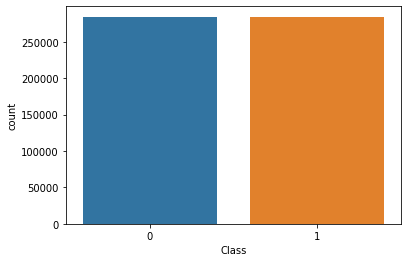

In [ ]:
sns.countplot(data = DF_resampled , x = 'Class')

In [ ]:
DF_resampled.Time = abs(DF_resampled.Time)
DF_resampled['Time'] = DF_resampled['Time'].apply(lambda sec : (sec/3600))
from sklearn.preprocessing import StandardScaler # importing a class from a module of a library

ss = StandardScaler() # object of the class StandardScaler ()
DF_resampled['Amount'] = ss.fit_transform(DF_resampled['Amount'].values.reshape(-1,1))

DF_resampled['Amount'] = abs(DF_resampled['Amount'])
DF_resampled['Amount']*=1000

In [ ]:
import math
DF_resampled['hour'] = DF_resampled['Time']%24   # 2 days of data
DF_resampled['hour'] = DF_resampled['hour'].apply(lambda x : math.floor(x))
# Calculating First and Second day
DF_resampled['day'] = DF_resampled['Time']/24   # 2 days of data
DF_resampled['day'] = DF_resampled['day'].apply(lambda x : 1 if(x==0) else math.ceil(x))
DF_resampled[['Time','hour','day','Amount','Class']]


,Time,hour,day,Amount,Class
0,0.000071,0,1,316.998663,1
1,0.000134,0,1,442.301375,1
2,0.000530,0,1,329.333975,0
3,0.000154,0,1,447.281060,1
4,0.000431,0,1,448.517658,0
...,...,...,...,...,...
568623,0.000135,0,1,83.227966,0
568624,0.000375,0,1,97.522106,0
568625,0.000254,0,1,536.497234,1
568626,0.000088,0,1,434.340407,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


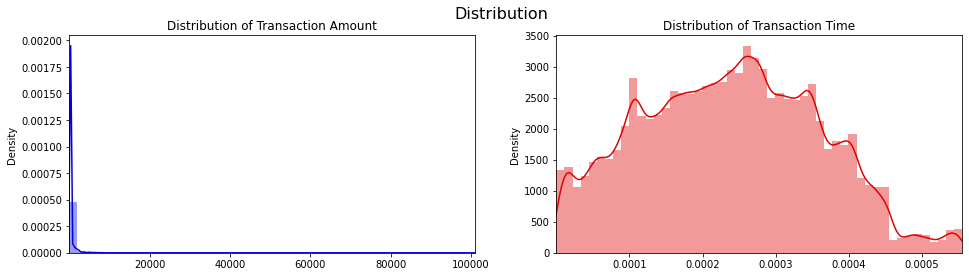

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))
fig.suptitle('Distribution', fontsize=16)
amount_val = DF_resampled['Amount'].values
time_val = DF_resampled['Time'].values
colors = ["#0101DF", "#DF0101"]
sns.distplot(amount_val, ax=ax[0], color=colors[0])
ax[0].set_title('Distribution of Transaction Amount')
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color=colors[1])
ax[1].set_title('Distribution of Transaction Time')
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
import IPython
import plotly as py
import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
from pylab import rcParams


In [ ]:
# Define a function to create a scatterplot of the data and labels
def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label = "Non-Fraud", alpha = 0.5, linewidth = 0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label = "Fraud", alpha = 0.5, linewidth = 0.15, c = 'r')
    plt.legend()
    return plt.show()

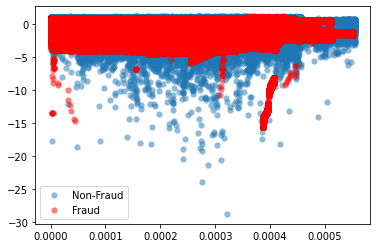

In [ ]:
X = DF_resampled.loc[:, DF_resampled.columns != 'Class'].values
y = DF_resampled.Class.values
plot_data(X,y)

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV


model_rf = RandomForestClassifier(random_state = 5)



# Fit the model to the training set
model_rf.fit(X_train, y_train.values.ravel())

# Obtain predictions from the test data
predicted_rf = model_rf.predict(X_test)

# Obtain the results from the classification report and confusion matrix
print('Classifcation report:\n', classification_report(y_test, predicted_rf))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = predicted_rf))

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       1.00      1.00      1.00    142156

    accuracy                           1.00    284314
   macro avg       1.00      1.00      1.00    284314
weighted avg       1.00      1.00      1.00    284314

Confusion matrix:
 [[142113     45]
 [     0 142156]]


In [ ]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [ ]:
tsne = DF_resampled
df2 = tsne_data[tsne_data.Class == 1]
df2 = pd.concat([df2, tsne_data[tsne_data.Class == 0].sample(n = 10000)], axis = 0)

In [ ]:
#Scale features to improve the training ability of TSNE.
standard_scaler = StandardScaler()
df2_std = standard_scaler.fit_transform(df2)

#Set y equal to the target values.
y = df2.iloc[:,-1].values

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(df2_std)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



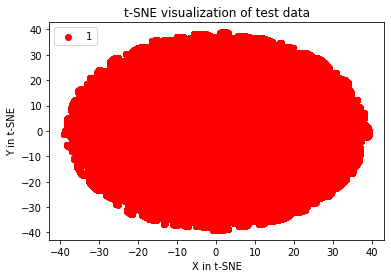

In [ ]:
#Build the scatter plot with the two types of transactions.
color_map = {0:'red', 1:'blue'}
plt.figure()
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = x_test_2d[y==cl,0], 
                y = x_test_2d[y==cl,1], 
                c = color_map[idx], 
                label = cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()
